# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
!pip install statsmodels

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("/Volumes/GoogleDrive/My Drive/Statistics/data/NHANES.csv")

In [243]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [244]:
 da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [245]:
# Relabel the marital status variable DMDMARTL
da['marital_status'] = da['DMDMARTL'].replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated",
                                               5:"Never married",6:"Living with partner",77:"Refused",
                                               99:"Don't know"})                                  

In [246]:
# Frequency table for all people
a = da.marital_status.value_counts()
a

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: marital_status, dtype: int64

In [247]:
# Percentage frequencey table of marital status for all people
a/a.sum()

Married                0.507855
Never married          0.183412
Divorced               0.105773
Living with partner    0.096273
Widowed                0.072342
Separated              0.033979
Refused                0.000365
Name: marital_status, dtype: float64

In [248]:
# Frequecy table for male's marital status
da[da.RIAGENDR == 1]['marital_status'].value_counts()

Married                1477
Never married           484
Living with partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
Name: marital_status, dtype: int64

In [249]:
# Another way of doing frequency table for male's marital status
m = da.loc[da.RIAGENDR ==1,'marital_status'].value_counts()
m

Married                1477
Never married           484
Living with partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
Name: marital_status, dtype: int64

In [250]:
# Percentage frequency table of male's marial status
m/m.sum()

Married                0.562881
Never married          0.184451
Living with partner    0.100991
Divorced               0.087271
Widowed                0.038110
Separated              0.025915
Refused                0.000381
Name: marital_status, dtype: float64

In [251]:
# Frequency table of marital status for women
f = da.loc[da.RIAGENDR == 2,'marital_status'].value_counts()
f

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Separated               118
Refused                   1
Name: marital_status, dtype: int64

In [252]:
# Percentage frequency table of female's marital status
f/f.sum()

Married                0.457193
Never married          0.182456
Divorced               0.122807
Widowed                0.103860
Living with partner    0.091930
Separated              0.041404
Refused                0.000351
Name: marital_status, dtype: float64

In [253]:
# Frequency table of marital status for all people age between 30 and 40
da.loc[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40),'marital_status'].value_counts()

Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: marital_status, dtype: int64

In [254]:
# People between 30 and 40 
da30_40 = da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)]

# Frequency table of men's marital status
da30_40.loc[da30_40.RIAGENDR == 1,'marital_status'].value_counts()

Married                275
Never married          101
Living with partner     78
Divorced                24
Separated               12
Widowed                  3
Refused                  1
Name: marital_status, dtype: int64

In [255]:
# Frequency table of women's marital status
da30_40.loc[da30_40.RIAGENDR == 2,'marital_status'].value_counts()

Married                285
Never married          116
Living with partner     65
Divorced                46
Separated               18
Widowed                  2
Name: marital_status, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

For both groups, married and never married ranks first and second respectively. More than half the men are married (56%), while married women composed of 46% of all women. For women, the third most popular group is Divorced, whereas that of men is living with partner.Women are also likely widowed compared to men.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

The top three categories of women's marital status are the same of that of the population: Married, Never married, and Divorced respectively. The overal population's 4th category are Living with partner, while that of women is Widowed. 

Women between age of 30 and 40 are more likely to living with partner than divorced, and tend not to be widowed. This makes sense given they're still younger in life. 

__Q1c.__ Repeat part b for the men.

Men has the same top categories as the overall population, with Married and Never Married tops the list. Men are more likely to live with partner than divorced. The same goes for men between 30 and 40. Men this age are also more likely to be living with partner than divorced, and tend not to be widowed.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [257]:
da_female = da[da.RIAGENDR ==2]

In [258]:
da["age_group"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
dx = da_female.groupby(['age_group'])['marital_status'].value_counts().unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
dx

marital_status,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
age_group,,,,,,,
"(18, 30]",0.019892,0.206148,0.285714,0.468354,NaN,0.019892,NaN
"(30, 40]",0.090717,0.120253,0.544304,0.204641,NaN,0.035865,0.004219
"(40, 50]",0.137450,0.073705,0.573705,0.125498,NaN,0.065737,0.023904
"(50, 60]",0.176596,0.068085,0.546809,0.089362,0.002128,0.057447,0.059574
"(60, 70]",0.192744,0.043084,0.480726,0.086168,NaN,0.049887,0.147392
"(70, 80]",0.143902,0.007317,0.317073,0.051220,NaN,0.019512,0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

Among women, the divorces rate tend to rise with age, with its peak at around women age between 60 and 70. The opposite goes with living with partner and never married, the older the women gets, the less likely they are to live with partner. The rate  of women who are separated rise with age, peaks at 40 to 50 years olf age, and then decreases again. The windowed proportion rises with age,the older the women get, the more likely she is to be widowed.

__Q2b.__ Repeat the construction for males.

In [259]:
da_male = da[da.RIAGENDR == 1]

In [260]:
dx = da_male.groupby(['age_group'])['marital_status'].value_counts().unstack()
dx = dx.apply(lambda x: x/x.sum(),axis = 1)
dx

marital_status,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
age_group,,,,,,,
"(18, 30]",0.004237,0.201271,0.220339,0.555085,NaN,0.014831,0.004237
"(30, 40]",0.052402,0.157205,0.563319,0.194323,0.002183,0.026201,0.004367
"(40, 50]",0.084788,0.082294,0.703242,0.097257,NaN,0.027431,0.004988
"(50, 60]",0.125551,0.074890,0.651982,0.103524,NaN,0.022026,0.022026
"(60, 70]",0.125858,0.050343,0.665904,0.086957,NaN,0.032037,0.038902
"(70, 80]",0.141791,0.022388,0.611940,0.022388,NaN,0.034826,0.166667


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

For male, the divorced rate and widowed increase with age, the older the men get, the more likely he is to be divorced or widowed. The opposite goes true for living with partner and never married, these rates decrease with age. The rate of married among men rises with age and peaks at group age 40-50, and then fell gain.

From the above tables, we can see that men get married at later age but are more likely to be married after 30 than women. Women between age 70-80 have significant higher rate of being widowed than men; this coud be explained due to the fact that women are more likely to live longer than men.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT'>

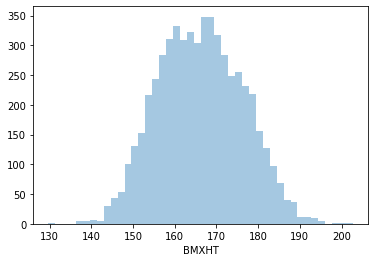

In [261]:
sns.distplot(da.BMXHT,kde = False)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

The default value of bins argument above gives a roughly bell-shaped distribution with median at 170 cm.

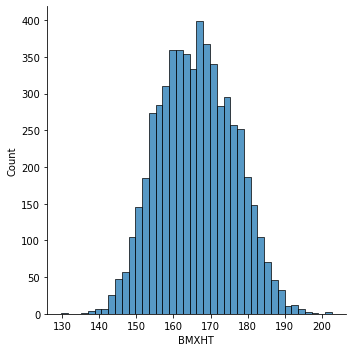

In [262]:
sns.displot(da.BMXHT,bins = 40,kde = False)

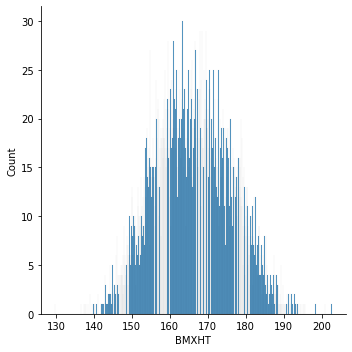

In [263]:
sns.displot(da.BMXHT,bins = 1000,kde = False)

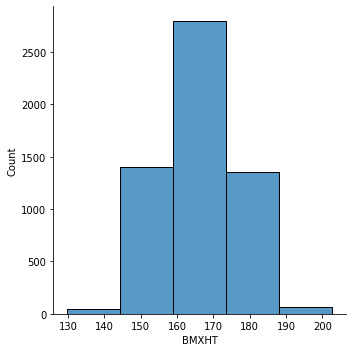

In [264]:
sns.displot(da.BMXHT,bins = 5,kde = False)

When the number of bins is excessively large, the distribution's catches a lot of noises and less informative; on the other hand,when the number of bins is excessively small, the distribution gives off incomplete information and not very informative

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

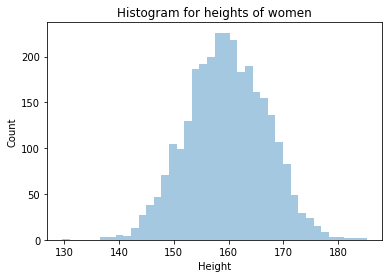

In [265]:
sns.distplot(da[da.RIAGENDR ==2]['BMXHT'],kde = False)
plt.title('Histogram for heights of women')
plt.xlabel('Height')
plt.ylabel('Count')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

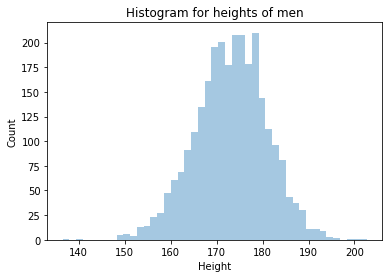

In [266]:
sns.distplot(da[da.RIAGENDR ==1]['BMXHT'],kde = False)
plt.title('Histogram for heights of men')
plt.xlabel('Height')
plt.ylabel('Count')

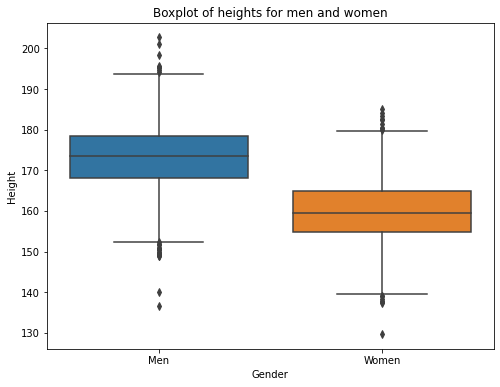

In [267]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'RIAGENDR', y = 'BMXHT',data = da)
plt.title('Boxplot of heights for men and women')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.xticks([0,1],['Men','Women'])
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

The distribution is clearer in the histograms compared to the boxplot, and outliers and median and IQR are easier to see in the boxplots than in the histograms

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

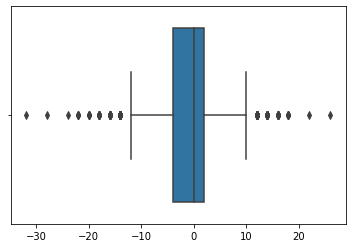

In [268]:
sns.boxplot(da.BPXSY2 - da.BPXSY1)

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

About half of the subject have a lower SPB on the second reading compared to the first

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

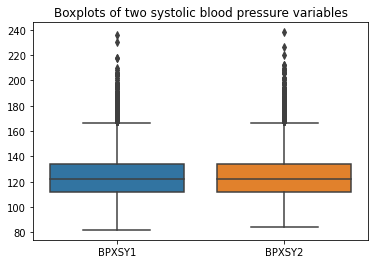

In [269]:
sns.boxplot( data = da.loc[:,['BPXSY1','BPXSY2']])
plt.title('Boxplots of two systolic blood pressure variables')
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

The two blood pressure measurements seem to have rougly the same median and similar distribution, with many outliers on the higher side. 
The median of the within-subject differences is 0, with roughly 50% range from -5 to 2. 


## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [280]:
# First we will relabel the educational attainment category for better clarity
da['education'] = da['DMDEDUC2'].replace({1:'Less than 9th',2:'9-11th grade',3:'High school graduate',
                                         4:'Some college/AA',5:'College graduate and above',
                                         7:'Refused',9:"Don't know"})

In [284]:
# Find out how many null/missing values
da['education'].isnull().sum()

0

In [285]:
# Fill the null values with 'Missing'
da['education'] = da['education'].fillna('Missing')

In [283]:
da['education'].value_counts()

Some college/AA               1621
College graduate and above    1366
High school graduate          1186
Less than 9th                  655
9-11th grade                   643
Missing                        261
Don't know                       3
Name: education, dtype: int64

In [291]:
# First, drop missing and don't know values
dx = da.loc[~da.education.isin(["Don't know", "Missing"]), :]

In [293]:
df = dx.groupby('education')['DMDHHSIZ'].value_counts().unstack()
df = df.apply(lambda x : x/x.sum(),axis = 1)
df

DMDHHSIZ,1,2,3,4,5,6,7
education,,,,,,,
9-11th grade,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
College graduate and above,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
High school graduate,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
Less than 9th,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
Some college/AA,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034


__Q5a.__ Comment on any major differences among the distributions.

Text(0, 0.5, 'Household size')

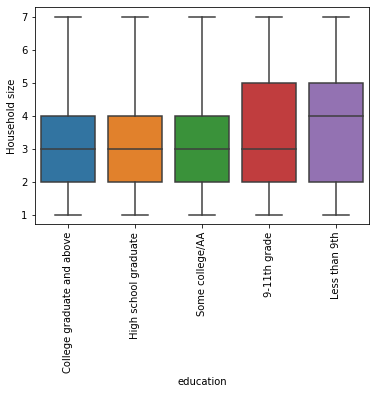

In [301]:
# Make boxplots
sns.boxplot(x = 'education', y = 'DMDHHSIZ',data = dx)
plt.xticks(rotation = 90)
plt.ylabel('Household size')

From the frequency table and the additional boxplot above, the median household size of people with less than 9th grade of education is higher (about 4.5) while that of the rest of the groups are about 3. 
 
The people with 9-11th grade and less than 9th grade of education have more variation in household size with half of them have household size between 2 and 5. 

The high school, some college and college graduate groups have pretty similar distribution with median household size about 3, and 50% of the households have size between 2 and 4.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [308]:

da30_40 = da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)]
da30_40['Gender'] = da30_40.RIAGENDR.replace({1:'Men' , 2 : 'Women'})
da30_40.groupby(['education','Gender'])['DMDHHSIZ'].median()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


education                   Gender
9-11th grade                Men       4.5
                            Women     5.0
College graduate and above  Men       3.0
                            Women     3.0
High school graduate        Men       4.0
                            Women     5.0
Less than 9th               Men       5.0
                            Women     5.0
Some college/AA             Men       4.0
                            Women     4.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.